# 1-D single phase fluid flow modelling

**FTCS scheme**

1. Explicit Scheme
2. Stability Conditions

Defining the numpy matrix 

In [123]:
import numpy as np
import matplotlib.pyplot as plt


Dh = 0.0001            #Hydraulic Diffusivity
dt = 0.0045       #time discretization
dx = 0.001     #space discretization
p_nn = np.zeros(101,dtype = np.float64)
for i in range(101):
    p_nn[i] = 27586206.9
p_nn[0] = 0
p_nn[100] = 0
diff_number = (Dh *dt) / (dx *dx)
print(diff_number)

0.45


In FTCS(Forward Euler Scheme) scheme diffusion number(diff_number) should be less than or equal to 0.5

Number of Iterations : 37288
[0.         0.07072407 0.14137833 0.21189308 0.28219871 0.35222585
 0.42190538 0.49116855 0.55994699 0.62817282 0.69577873 0.76269799
 0.82886456 0.89421314 0.95867923 1.02219923 1.08471044 1.14615117
 1.20646079 1.26557978 1.32344979 1.38001372 1.43521574 1.48900138
 1.54131755 1.59211263 1.64133649 1.68894054 1.73487781 1.77910297
 1.82157237 1.8622441  1.90107801 1.93803579 1.97308097 2.00617895
 2.03729708 2.06640464 2.0934729  2.11847517 2.14138675 2.16218504
 2.18084952 2.19736176 2.21170547 2.2238665  2.23383284 2.24159465
 2.24714428 2.25047625 2.25158727 2.25047625 2.24714428 2.24159465
 2.23383284 2.2238665  2.21170547 2.19736176 2.18084952 2.16218504
 2.14138675 2.11847517 2.0934729  2.06640464 2.03729708 2.00617895
 1.97308097 1.93803579 1.90107801 1.8622441  1.82157237 1.77910297
 1.73487781 1.68894054 1.64133649 1.59211263 1.54131755 1.48900138
 1.43521574 1.38001372 1.32344979 1.26557978 1.20646079 1.14615117
 1.08471044 1.02219923 0.95867923

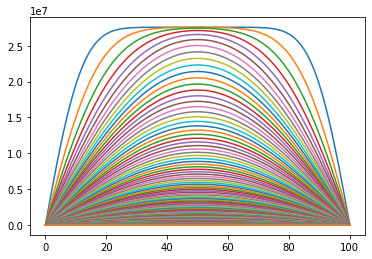

In [124]:
counter = 0
t = 0
error = 1
threshold = 1e-3
x = np.arange(0,101,1)
while error > threshold:
    counter += 1
    p = p_nn.copy()
    for i in range(1,100):
        p_nn[i] = p[i] + (p[i-1] - 2*p[i] + p[i+1]) * diff_number              
    error = max(abs(p - p_nn))
    t += dt
    if counter%100 == 0:
        x1 = np.arange(0,t,t/101)
        plt.plot(x, p)
print("Number of Iterations :",counter)
print(p)
x1 = np.arange(0,t,t/101)
# x = np.arange(0,t,t/101)
# plt.plot(x, p)
plt.show()
del p,error,counter,x,x1

**BTCS Scheme(Backward Euler)**

1. Implicit Scheme
2. No stability Conditions

Solving System of Linear equation

In [125]:
#a = Lower Diag, b = Main Diag, c = Upper Diag, d = solution vector
def TDMASolve(a, b, c, d):
    n = len(a)
    ac, bc, cc, dc = map(np.array, (a, b, c, d))
    xc = []
    for j in range(1, n):
        if(bc[j - 1] == 0):
            ier = 1
            return
        ac[j] = ac[j]/bc[j-1]
        bc[j] = bc[j] - ac[j]*cc[j-1]
    if(b[n-1] == 0):
        ier = 1
        return
    for j in range(1, n):
        dc[j] = dc[j] - ac[j]*dc[j-1]
    dc[n-1] = dc[n-1]/bc[n-1]
    for j in range(n-2, -1, -1):
        dc[j] = (dc[j] - cc[j]*dc[j+1])/bc[j]
    return dc

In [126]:
Dh = 0.49345            #Hydraulic Diffusivity
dt = 0.01       #time discretization
dx = 0.1     #space discretization
p = np.zeros(101,dtype = np.float64)
for i in range(101):
    p[i] = 27586206.9#u at previous time step
p_new = np.zeros(101,dtype = np.float64)          #unknown u at new time step
a = np.zeros(100,dtype = np.float64)
d = np.zeros(101,dtype = np.float64)
c = np.zeros(100,dtype = np.float64)
Dn = (Dh *dt) / (dx *dx)
b = np.zeros(101,dtype = np.float64)
print(Dn)

0.49344999999999994


In [127]:
for i in range(0,100):        #loop runs for i=1 to i=Nx
    a[i] = -Dn
    c[i] = -Dn
    
for i in range(0,100):
    d[i] = 1 + (2*Dn)
    
print(a)

[-0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345 -0.49345
 -0.49345 -0.49345 -0.49345 -0.49345]


Number of iterations : 34422
[66.75991322 66.15720251 65.55440744 64.9514647  64.34831109 63.74488365
 63.14111967 62.53695678 61.932333   61.3271868  60.72145715 60.11508362
 59.50800637 58.9001663  58.29150501 57.68196495 57.07148939 56.46002254
 55.84750958 55.23389672 54.61913124 54.00316154 53.38593722 52.7674091
 52.14752928 51.5262512  50.90352964 50.27932082 49.6535824  49.02627356
 48.39735501 47.76678903 47.13453952 46.50057205 45.86485384 45.22735385
 44.58804278 43.9468931  43.3038791  42.65897689 42.01216441 41.3634215
 40.71272988 40.06007319 39.40543698 38.74880877 38.09017799 37.42953607
 36.76687639 36.10219433 35.43548723 34.76675442 34.09599724 33.42321898
 32.74842493 32.07162236 31.39282049 30.71203052 30.02926559 29.34454079
 28.6578731  27.96928143 27.27878658 26.58641119 25.89217978 25.19611866
 24.49825593 23.79862149 23.09724695 22.39416563 21.68941253 20.98302428
 20.27503912 19.56549685 18.85443881 18.14190781 17.42794811 16.71260538
 15.99592662 15.27796017

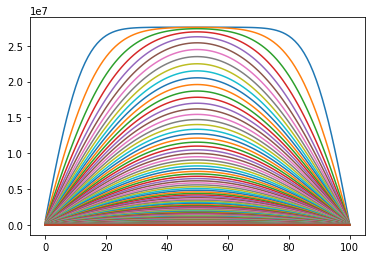

In [128]:
counter = 0
error = 1
threshold = 1e-3
t = 0
y1 = np.zeros(101,dtype = np.float64) 
x = np.arange(0,101,1)    #x-axis to plot graph
while error > threshold:
    counter += 1
    b = p.copy()
    b[0] = 100
    b[100] = 0
    p_new = TDMASolve(a,d,c,b)
    error = max(abs(p_new - p))
    p = p_new.copy()
    t += dt
    if counter%100 == 0:
        x1 = np.arange(0,t,t/101)
        plt.plot(x, p)
#     if counter == 100:
#         y1 = p
print("Number of iterations :",counter)
print(p)

# x1 = np.arange(0,t,t/101)

# plt.plot(x, y1)
plt.show()
del p,error,counter,x,y1,x1,p_new,t,a,b,c,d

**Crank-Nicolson Method**

In [129]:
Dh = 0.49345            #Hydraulic Diffusivity
dt = 0.01       #time discretization
dx = 0.1     #space discretization
p = np.zeros(101,dtype = np.float64)               #u at previous time step
for i in range(101):
    p[i] = 27586206.9
p_new = np.zeros(101,dtype = np.float64)          #unknown u at new time step
a = np.zeros((101,101),dtype = np.float64)
b = np.zeros((101,101),dtype = np.float64)
print(Dn)

0.49344999999999994


In [130]:
#Initiliazing A and B matrix
dim = 100
for i in range(1,dim):
    for j in range(1,dim):
        if i == j:
            a[i][j] = 1 + Dn
            b[i][j] = 1 - Dn
            a[i][j-1] = -Dn/2
            b[i][j-1] = Dn/2
            a[i][j+1] = -Dn/2
            b[i][j+1] = Dn/2
        else:
            pass
    
a[0][0] = a[dim][dim] = 1 + Dn
b[0][0] = b[dim][dim] = 1 - Dn
a[0][1] = a[dim][dim-1] = -Dn/2
b[0][1] = b[dim][dim-1] = Dn/2

In [131]:
def matInverse(m):
    return np.linalg.inv(m)

def matMultiplication(m,n):
    return np.matmul(m,n)

Number of iterations : 34456
[60.4459226  80.2876763  80.35231849 80.41682147 80.48112211 80.54515743
 80.60886474 80.67218166 80.7350462  80.79739681 80.85917243 80.92031259
 80.98075741 81.04044773 81.09932508 81.15733183 81.21441118 81.27050724
 81.32556509 81.37953082 81.43235159 81.48397568 81.53435255 81.58343288
 81.6311686  81.67751298 81.72242064 81.76584761 81.80775138 81.84809091
 81.8868267  81.92392084 81.95933699 81.99304049 82.02499833 82.05517923
 82.08355363 82.11009374 82.1347736  82.15756902 82.1784577  82.19741918
 82.21443488 82.22948817 82.24256428 82.25365043 82.26273575 82.26981136
 82.27487031 82.27790767 82.27892045 82.27790767 82.27487031 82.26981136
 82.26273575 82.25365043 82.24256428 82.22948817 82.21443488 82.19741918
 82.1784577  82.15756902 82.1347736  82.11009374 82.08355363 82.05517923
 82.02499833 81.99304049 81.95933699 81.92392084 81.8868267  81.84809091
 81.80775138 81.76584761 81.72242064 81.67751298 81.6311686  81.58343288
 81.53435255 81.483975

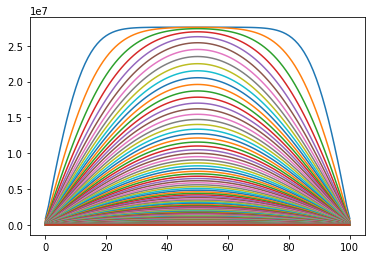

In [132]:
counter = 0
error = 1
threshold = 1e-3
t = 0
y1 = np.ones(101,dtype = np.float64) 
x = np.arange(0,101,1)    #x-axis to plot graph
a_inv = matInverse(a)
while error > threshold:
    counter += 1
    temp2 = p.copy()
    temp2[0] = 100
    temp2[100] = 100
#     p[0] = 10
#     p[100] = 0
    temp = matMultiplication(a_inv,b)
    p_new = matMultiplication(temp,temp2)
    error = max(abs(p_new - p))
    p = p_new.copy()
    t += dt
    if counter%100 == 0:
        x1 = np.arange(0,t,t/101)
        plt.plot(x, p)
#     for i in range(1,4):
#         for j in range(1,4):
#             if counter % 1000 == 0:
#                 plt.subplot(3,i,j)
#                 plt.plot(x, p)
    

print("Number of iterations :",counter)
print(p)
#different graphs


plt.show()